# Práctica Final Airbnb 

## Marta Llanos Rodriguez 

In [58]:
#librerias utilizadas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime


import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

# Exploración de los datos

En este primer notebook vamos a realizar el analisis el dataset dado y la variable objetivo 

In [59]:
df = pd.read_csv("airbnb-listings-extract.csv", sep=';', low_memory=False)
df.rename(columns=str.lower, inplace=True)
df.head(2)

,id,listing url,scrape id,last scraped,name,summary,space,description,experiences offered,neighborhood overview,notes,transit,access,interaction,house rules,thumbnail url,medium url,picture url,xl picture url,host id,host url,host name,host since,host location,host about,host response time,host response rate,host acceptance rate,host thumbnail url,host picture url,host neighbourhood,host listings count,host total listings count,host verifications,street,neighbourhood,neighbourhood cleansed,neighbourhood group cleansed,city,state,zipcode,market,smart location,country code,country,latitude,longitude,property type,room type,accommodates,bathrooms,bedrooms,beds,bed type,amenities,square feet,price,weekly price,monthly price,security deposit,cleaning fee,guests included,extra people,minimum nights,maximum nights,calendar updated,has availability,availability 30,availability 60,availability 90,availability 365,calendar last scraped,number of reviews,first review,last review,review scores rating,review scores accuracy,review scores cleanliness,review scores checkin,review scores communication,review scores location,review scores value,license,jurisdiction names,cancellation policy,calculated host listings count,reviews per month,geolocation,features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

In [61]:
print (df.columns.values)

['id' 'listing url' 'scrape id' 'last scraped' 'name' 'summary' 'space'
 'description' 'experiences offered' 'neighborhood overview' 'notes'
 'transit' 'access' 'interaction' 'house rules' 'thumbnail url'
 'medium url' 'picture url' 'xl picture url' 'host id' 'host url'
 'host name' 'host since' 'host location' 'host about'
 'host response time' 'host response rate' 'host acceptance rate'
 'host thumbnail url' 'host picture url' 'host neighbourhood'
 'host listings count' 'host total listings count' 'host verifications'
 'street' 'neighbourhood' 'neighbourhood cleansed'
 'neighbourhood group cleansed' 'city' 'state' 'zipcode' 'market'
 'smart location' 'country code' 'country' 'latitude' 'longitude'
 'property type' 'room type' 'accommodates' 'bathrooms' 'bedrooms' 'beds'
 'bed type' 'amenities' 'square feet' 'price' 'weekly price'
 'monthly price' 'security deposit' 'cleaning fee' 'guests included'
 'extra people' 'minimum nights' 'maximum nights' 'calendar updated'
 'has availability

In [62]:
#Movemos la columna price al final del dataset 
y =df[['price']]
del df['price']
df= df.join(y)

El dataset original contiene casi 15.000 entradas y un total de 88 columnas 

In [63]:
print ('Número de entradas: ', df.shape[0])
print ('Número de columnas: ', df.shape[1] - 1)

Número de entradas:  14780
Número de columnas:  88


In [64]:
df.dtypes

id                                  int64
listing url                        object
scrape id                           int64
last scraped                       object
name                               object
summary                            object
space                              object
description                        object
experiences offered                object
neighborhood overview              object
notes                              object
transit                            object
access                             object
interaction                        object
house rules                        object
thumbnail url                      object
medium url                         object
picture url                        object
xl picture url                     object
host id                             int64
host url                           object
host name                          object
host since                         object
host location                     

### Análisis de la variable objetivo 

La variable objetivo es price. Vamos a analizar cuantas veces se repite el mismo precio primero

In [65]:
df.price.dtype

dtype('float64')

In [66]:
df.price.describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: price, dtype: float64

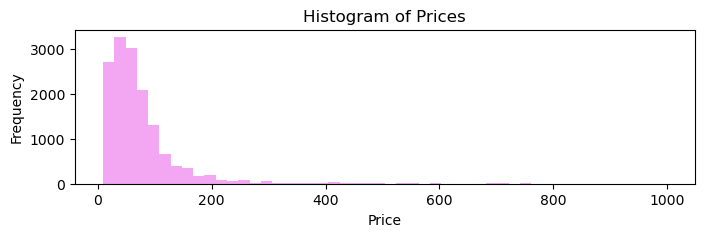

In [67]:
price_hist1 = df["price"]
fig, ax = plt.subplots(figsize=(8, 2))
ax.hist(price_hist1, bins=50, color='violet', alpha=0.7)
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
plt.title("Histogram of Prices")
plt.show()

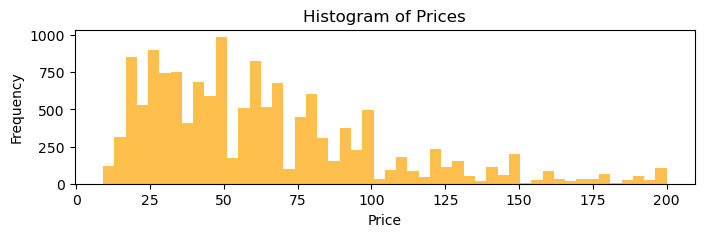

In [68]:
price_hist2 = price_hist1[price_hist1 <= 200]
fig, ax = plt.subplots(figsize=(8, 2))
ax.hist(price_hist2, bins=50, color='orange', alpha=0.7)
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
plt.title("Histogram of Prices")
plt.show()

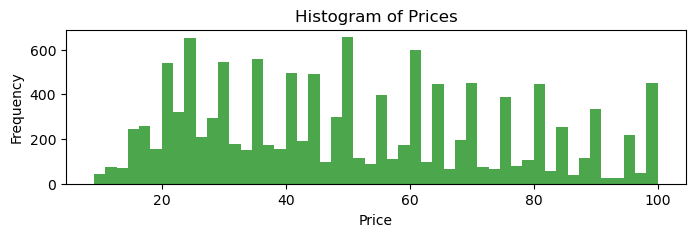

In [69]:
price_hist3 = price_hist1[price_hist1 <= 100]
fig, ax = plt.subplots(figsize=(8, 2))
ax.hist(price_hist3, bins=50, color='green', alpha=0.7)
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
plt.title("Histogram of Prices")
plt.show()

En el primer gráfico vemos que la mayoría están agrupados por debajo de 200 y en el segundo específicamente por debajo de 100.Esto puede tener relación con el número de habitaciones como se muestra en el gráfico a continuación. 
Casi todos los alojamientos tienen solo una habitación, lo que puede explicar por que los precios están condentrados de 100 para abajo. 

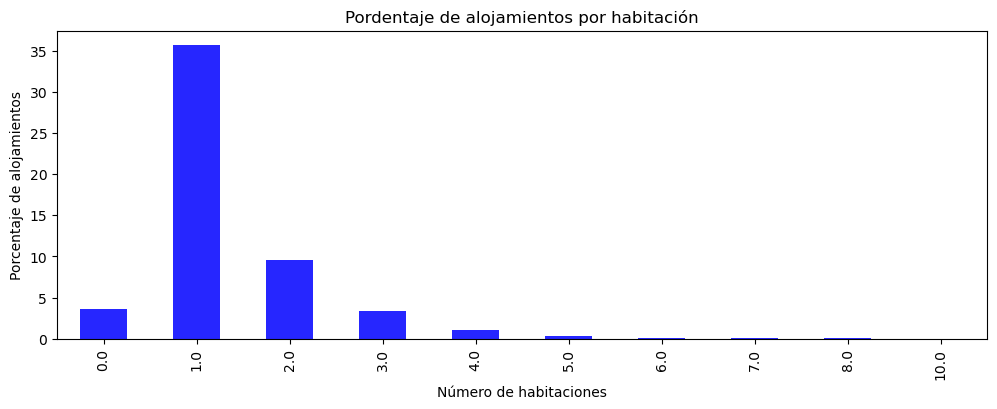

Porcentaje de alojamientos con solo una habitación: %35.65


In [70]:
from collections import Counter
bedrooms_counts = Counter(df.bedrooms)
tdf = pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
tdf = (tdf.iloc[-10:, :] / 27392) * 100

# Sort bedroom dataframe by number
tdf.sort_index(axis = 0, ascending = True, inplace = True)

# Plot percent of listings by bedroom number
ax = tdf.plot(kind = 'bar', figsize = (12, 4), color = 'blue', alpha = 0.85)
ax.set_xlabel("Número de habitaciones")
ax.set_ylabel("Porcentaje de alojamientos")
ax.set_title('Pordentaje de alojamientos por habitación')
ax.legend_.remove()

plt.show()

print ("Porcentaje de alojamientos con solo una habitación: %{0:.2f}".format(tdf[0][1]))

En este dataset tenemos varios países por lo que si realizamos un analisis de la distribución por geolocalización nos saldrá un mapa muy disperso del que no podremos sacar conclusiones. Por eso vamos a elegir la ciudad de Madrid para dibujar ese mapa de precio de airbnb según la ubicación. Además, más adelante veremos que los barrios que más entradas tienen corresponden todos a madrid. 

In [71]:
df.country.unique()

array(['United States', 'Spain', 'Netherlands', 'Belgium', 'France', nan,
       'United Kingdom', 'Ireland', 'Italy', 'Greece', 'Denmark',
       'Australia', 'Germany', 'Austria', 'Canada', 'Switzerland',
       'Hong Kong', 'Cuba'], dtype=object)

In [72]:
df_espana = df.loc[df['country'] == 'Spain']

In [73]:
df_madrid = df_espana.loc[df_espana['city'] == 'Madrid']

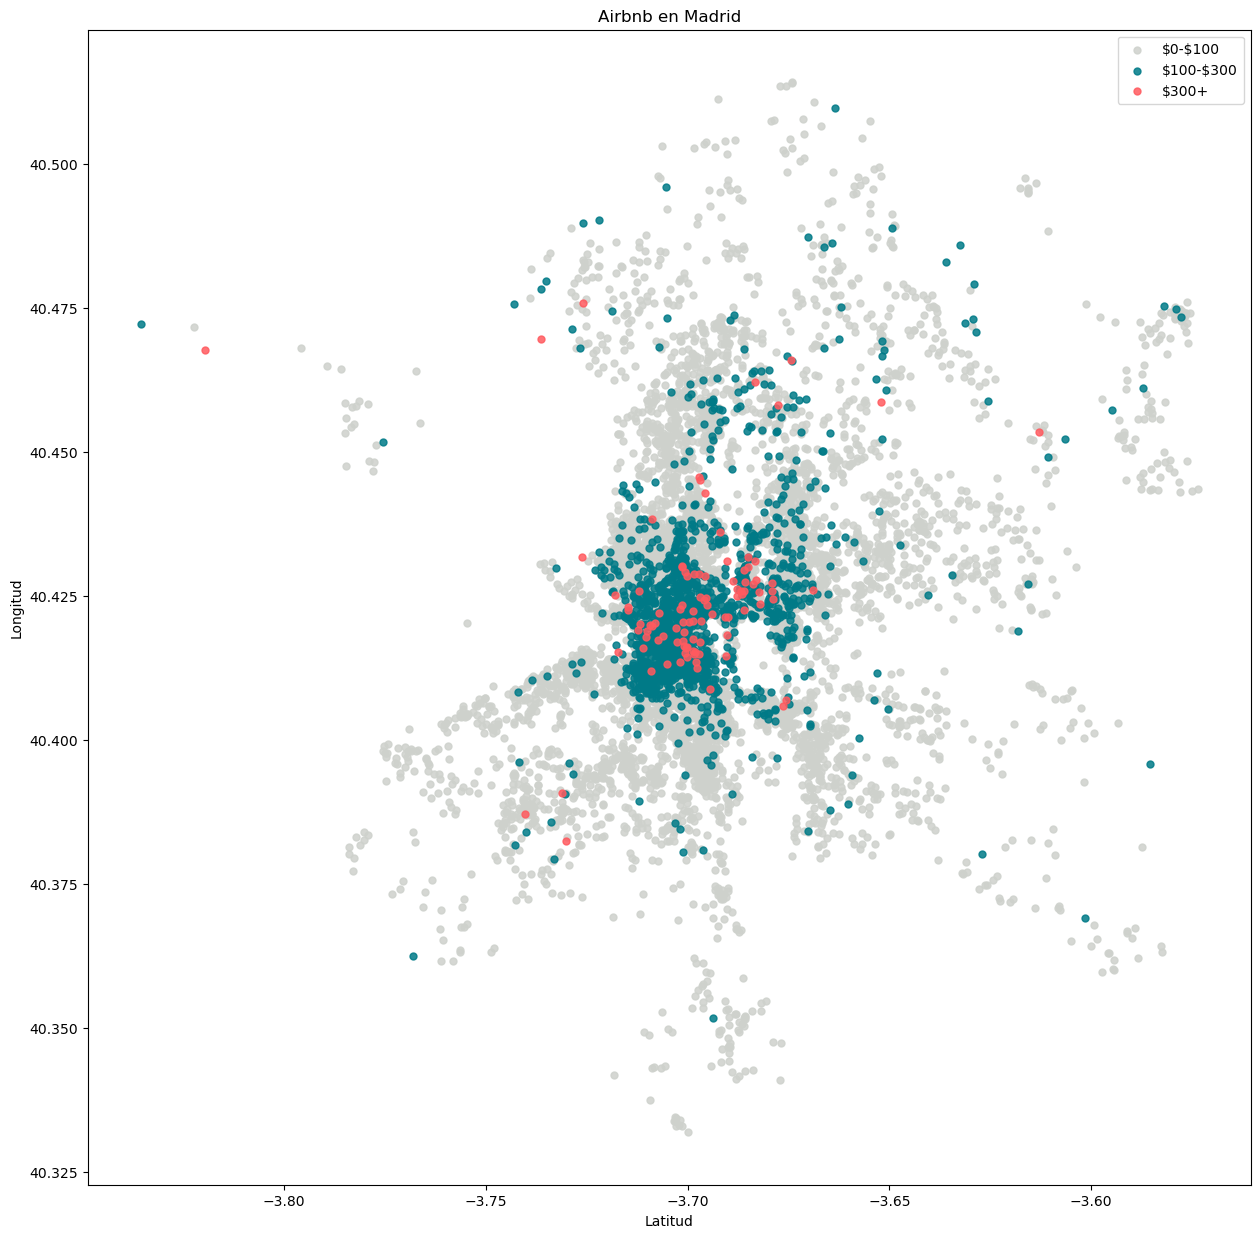

In [74]:
BNB_BLUE = '#007A87'
BNB_RED = '#FF5A5F'
BNB_DARK_GRAY = '#565A5C'
BNB_LIGHT_GRAY = '#CED1CC'

# Outline price buckets
intervals = [0,100,300, 10000]
leg_labels = []

# Get Labels for legend
for i in range(0,len(intervals) - 1):
    if i == len(intervals) - 2:
        leg_labels.append('\${}+'.format(intervals[i]))
    else:
        leg_labels.append("\${}-\${}".format(intervals[i], intervals[i+1]))    

buckets = []

# Divide up into price buckets
prices= df_madrid.price
for i in range(0, len(intervals) - 1):
    buckets.append(df_madrid[(prices > intervals[i]) & (prices < intervals[i+1])])

colors = [BNB_LIGHT_GRAY, BNB_BLUE, BNB_RED]
alphas = [0.85, 0.85, 0.85]  

# Plot listings on scatterplot
plt.figure(figsize=(15, 15))
for i in range(0, len(buckets)):
    plt.scatter(buckets[i]['longitude'], buckets[i]['latitude'], alpha = alphas[i], c=colors[i], s=25)
    
plt.title('Airbnb en Madrid')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.legend(labels=leg_labels, loc = 'best')

plt.show()

 # Preprocesamiento de datos 

### ¿Qué variables no son importantes para determinar el precio del apartamento? 

In [75]:
#df.columns.values

Eliminaremos las variables que no son importantes para determinar el precio y otras que serían útiles para realizar un análisis de palabras, sin embargo en este documento no las utilizaremos.

In [76]:
no_utiles = ['id', 'listing url','scrape id','last scraped','thumbnail url','medium url','picture url',
             'xl picture url','host id','host url','host name','host thumbnail url','host picture url',
             'host neighbourhood','weekly price','monthly price','calendar updated','calendar last scraped','first review',
             'last review','reviews per month','geolocation','calculated host listings count','host listings count','host total listings count'
]
utiles_pero_no_ahora = ['name', 'summary', 'space', 'description',
       'neighborhood overview', 'notes', 'transit', 'access', 'interaction', 'house rules',
       'host location', 'host about', 'street', 'state', 'market', 'smart location', 'country', 'zipcode'
]
df.drop(no_utiles, axis=1, inplace=True)
df.drop(utiles_pero_no_ahora, axis=1, inplace=True)


### ¿Qué variables tienen una gran cantidad de datos missing? 

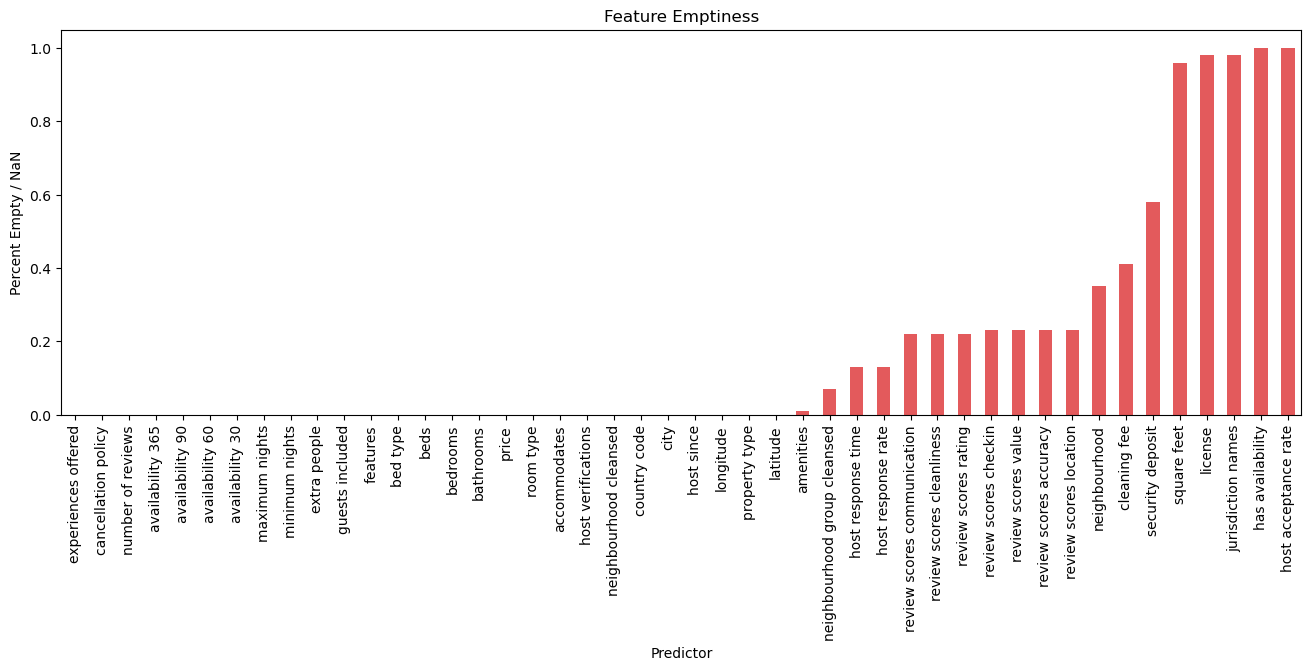

In [77]:
def percent_empty(df):
    
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, df.shape[1]):
    p, n = percent_empty(df.iloc[:,i])
    if n > 0:
        missing_columns.append(df.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(df.columns.values.tolist(), emptiness))

# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()

Eliminamos aquellas variables que tienen demasiados datos missing 

In [78]:
columnas_datos_missing = [
    'host acceptance rate', 'square feet', 'has availability', 'license', 'jurisdiction names'
]
df.drop(columnas_datos_missing, axis=1, inplace=True)

### Vamos a transformar algunas columnas para mejorar la calidad de los datos

#### 1. Reseñas

In [79]:
reviews = df.loc[: , "review scores rating":"review scores value"]
df['average review'] = reviews.mean(axis=1)

In [80]:
#Eliminamos el resto de columnas de reseñas que no vamos a utilizar 
df.drop(['availability 30', 'availability 60', 'availability 90', 'review scores rating', 
         'review scores accuracy', 'review scores cleanliness', 'review scores checkin',
       'review scores communication', 'review scores location', 'review scores value',
        'accommodates'], axis=1, inplace=True)

#### 2. Barrios 

In [81]:
df["final neighbourhood"] = df["neighbourhood group cleansed"].fillna(df["neighbourhood cleansed"])
df.drop(["neighbourhood", "neighbourhood group cleansed", "neighbourhood cleansed"], axis=1, inplace=True)

#### 3. ¿Desde cuando son host? 

In [82]:
df = df.dropna(subset=['host since'])
df['host since'] = df['host since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df['years being host'] = df['host since'].apply(lambda x: 2017 - x.year)
df.drop(['host since'], axis=1, inplace=True)

#### 4. Tiempo de respuesta 

In [83]:
df["host response time"].fillna(df["host response time"].mode()[0], inplace=True)

#### 5. Características, ervicios y verificación del anfitrión

In [84]:
df['features'].fillna("", inplace=True) # rellenamos los huecos con cadenas vacías
df['amenities'].fillna("", inplace=True)
df['host verifications'].fillna("", inplace=True)

df['features'] = df['features'].apply(lambda x: len(str(x).split(',')))
df['amenities'] = df['amenities'].apply(lambda x: len(str(x).split(',')))
df['host verifications'] = df['host verifications'].apply(lambda x: len(str(x).split(',')))


#### 6. De las columnas restantes, vamos a eliminar también las siguientes

In [85]:
df.drop(['experiences offered'], axis=1, inplace=True)
df.drop(['city', 'country code'], axis=1, inplace=True)

El dataframe resultado de esta transformación es el siguiente. Hemos eliminado solo 3 filas correspondientes a la columna host since (lo calculé asi: num_nan = df['host since'].isnull().sum())



In [86]:
df.head(2)

,host response time,host response rate,host verifications,latitude,longitude,property type,room type,bathrooms,bedrooms,beds,bed type,amenities,security deposit,cleaning fee,guests included,extra people,minimum nights,maximum nights,availability 365,number of reviews,cancellation policy,features,price,average review,final neighbourhood,years being host
0,within an hour,100.0,4,30.337361,-97.863277,Loft,Entire home/apt,1.0,1.0,1.0,Real Bed,23,100.0,NaN,1,0,2,1125,281,42,moderate,4,58.0,22.571429,78733,1
1,within an hour,100.0,4,41.389683,2.172625,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,7,200.0,40.0,2,44,1,1125,309,1,super_strict_30,3,70.0,19.428571,Eixample,1


In [87]:
print ('Número de entradas: ', df.shape[0])
print ('Número de columnas: ', df.shape[1] - 1)

Número de entradas:  14777
Número de columnas:  25


### Reducción de ruido de nuestros datos

#### 1. Barrio al que pertenecen las viviendas

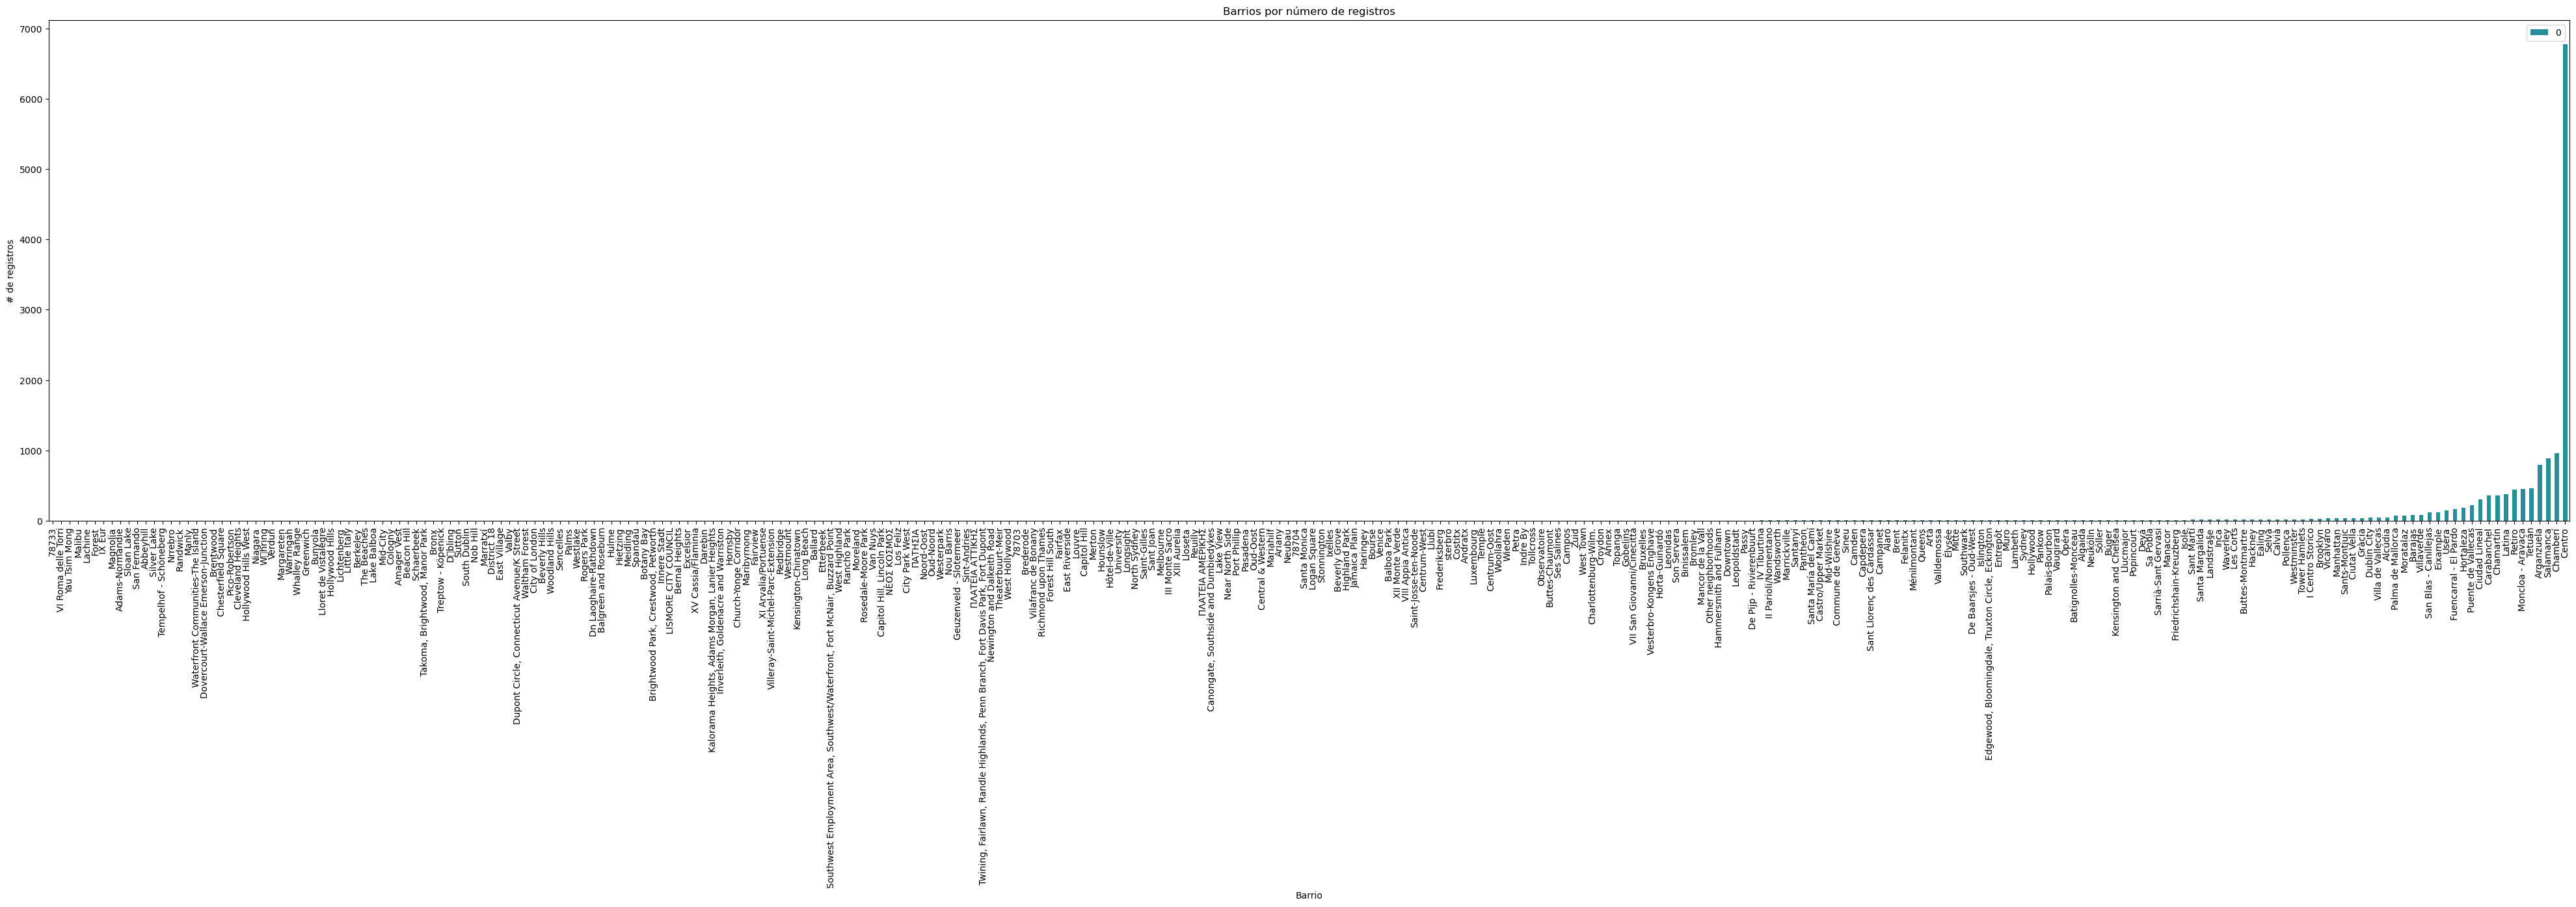

Número de barrios: 298


In [88]:
# Número de registros en cada barrio
nb_counts = Counter(df["final neighbourhood"])
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)

# Dibujamos
ax = tdf.plot(kind='bar', figsize = (50,10), color = '#007A87', alpha = 0.85)
ax.set_title("Barrios por número de registros")
ax.set_xlabel("Barrio")
ax.set_ylabel("# de registros")
plt.show()

print("Número de barrios:", len(nb_counts))

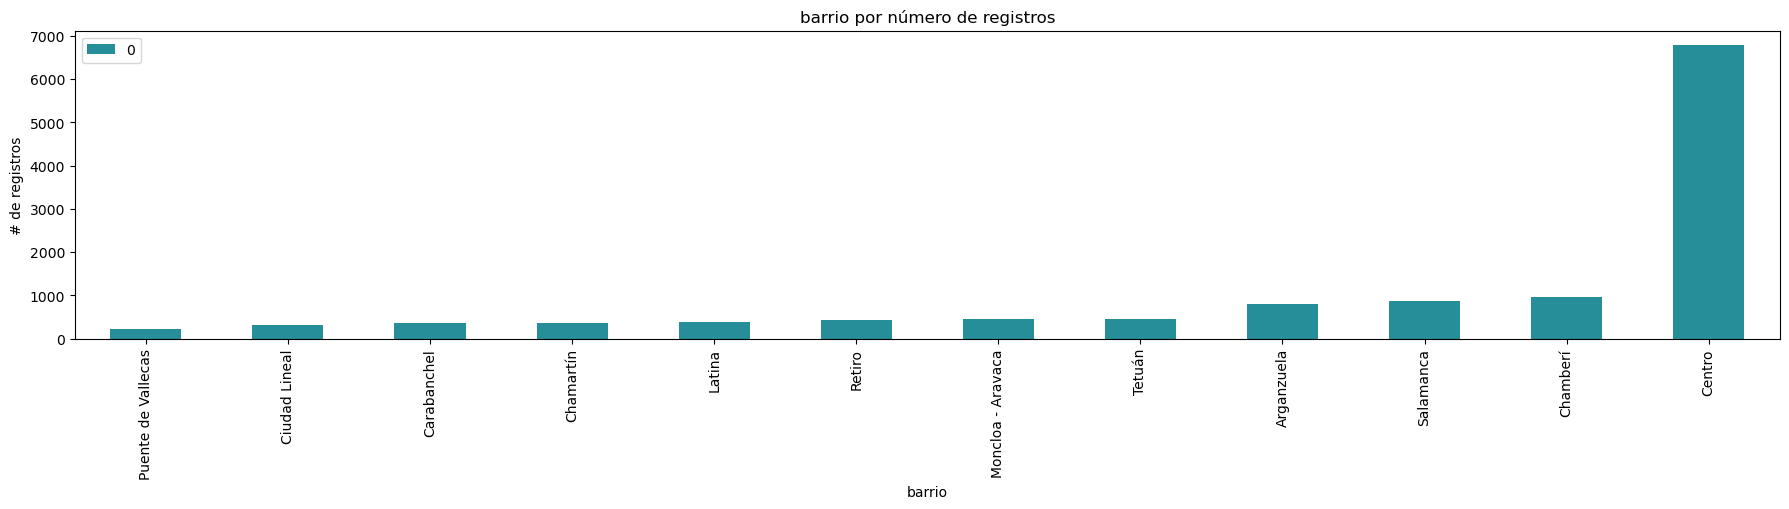

Número de registros eliminado:  2382
Número de barrios: 12


In [89]:
def remove_entries(df, n, col, element_name):
    nb_counts = Counter(df[col])
    inicial = df.shape[0]
    
    # Borramos elementos con menos de n registros
    for i in list(nb_counts):
        if nb_counts[i] < n:
            del nb_counts[i]
            df = df[df[col] != i]

    # Dibujamos
    tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
    ax = tdf.plot(kind='bar', figsize = (22,4), color = '#007A87', alpha = 0.85)
    ax.set_title(f"{element_name} por número de registros")
    ax.set_xlabel(f"{element_name}")
    ax.set_ylabel("# de registros")

    plt.show()

    print('Número de registros eliminado: ', inicial - df.shape[0])
    print(f"Número de {element_name}s:", len(nb_counts))
    
    return df
df = remove_entries(df, 200, "final neighbourhood", "barrio")

In [90]:
print ('Número de entradas: ', df.shape[0])
print ('Número de columnas: ', df.shape[1] - 1)

Número de entradas:  12395
Número de columnas:  25


#### 2. Tipo de propiedad

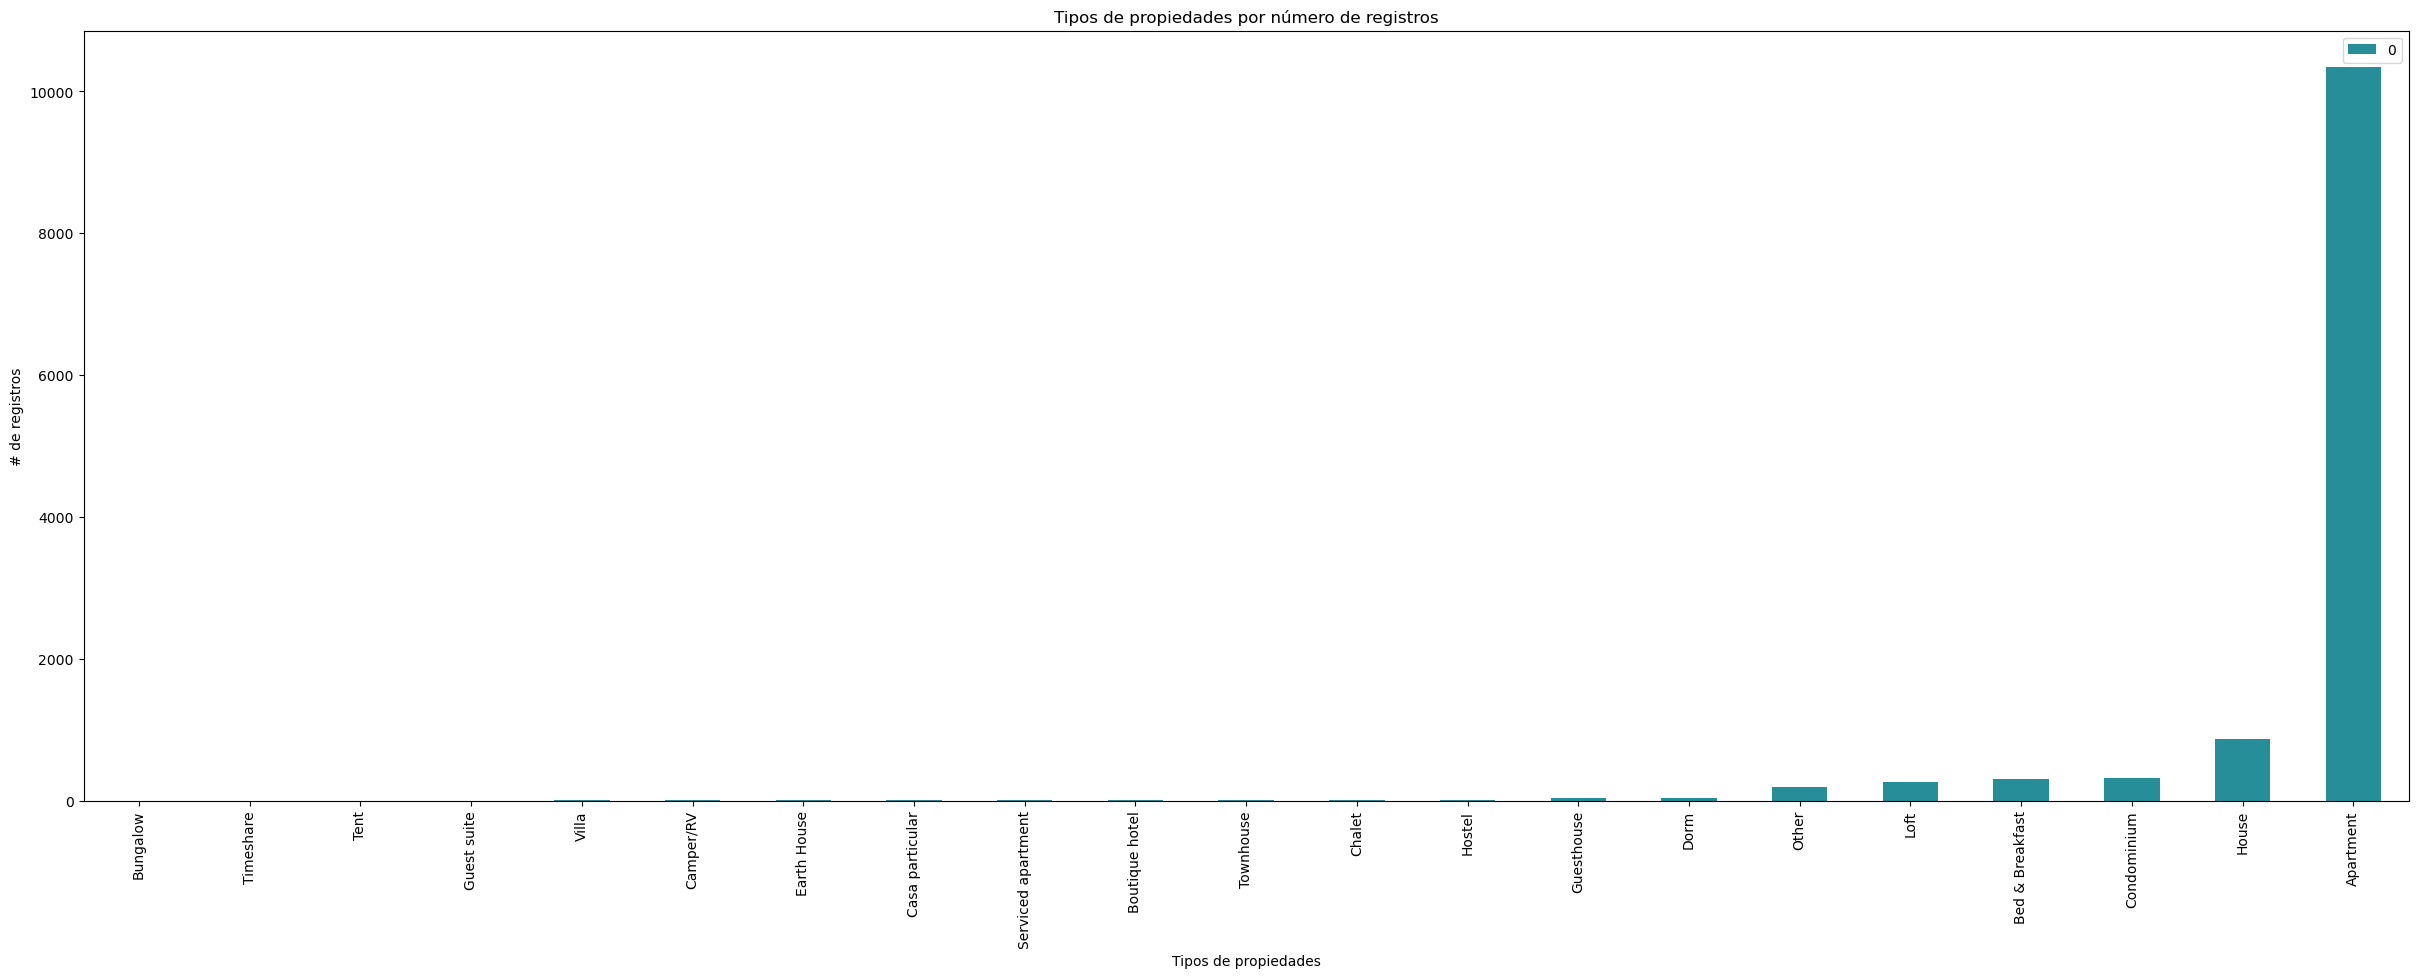

Tipos de propiedad: 21


In [91]:
# Número de registros en cada barrio
nb_counts = Counter(df['property type'])
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)

# Dibujamos
ax = tdf.plot(kind='bar', figsize = (30,10), color = '#007A87', alpha = 0.85)
ax.set_title("Tipos de propiedades por número de registros")
ax.set_xlabel("Tipos de propiedades")
ax.set_ylabel("# de registros")
plt.show()

print("Tipos de propiedad:", len(nb_counts))

In [92]:
df['property type'].value_counts()

Apartment             10340
House                   867
Condominium             315
Bed & Breakfast         301
Loft                    256
Other                   192
Dorm                     36
Guesthouse               32
Hostel                   15
Chalet                    9
Townhouse                 7
Boutique hotel            6
Serviced apartment        5
Casa particular           3
Earth House               3
Camper/RV                 2
Villa                     2
Tent                      1
Timeshare                 1
Bungalow                  1
Guest suite               1
Name: property type, dtype: int64

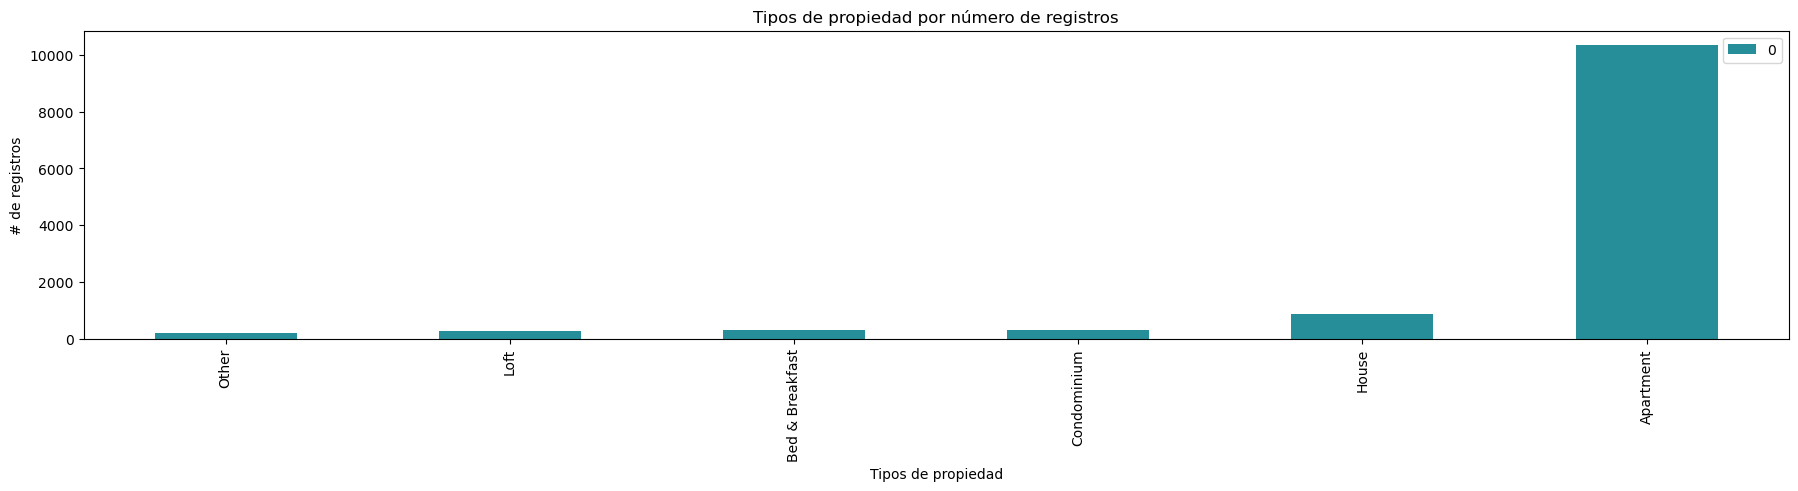

Número de registros eliminado:  124
Número de Tipos de propiedads: 6


In [93]:
df = remove_entries(df, 100, "property type", "Tipos de propiedad")

In [94]:
print ('Número de entradas: ', df.shape[0])
print ('Número de columnas: ', df.shape[1] - 1)

Número de entradas:  12271
Número de columnas:  25


#### 3. Tipo de cama

In [95]:
df['bed type'].value_counts()

Real Bed         11990
Pull-out Sofa      227
Futon               36
Couch               14
Airbed               4
Name: bed type, dtype: int64

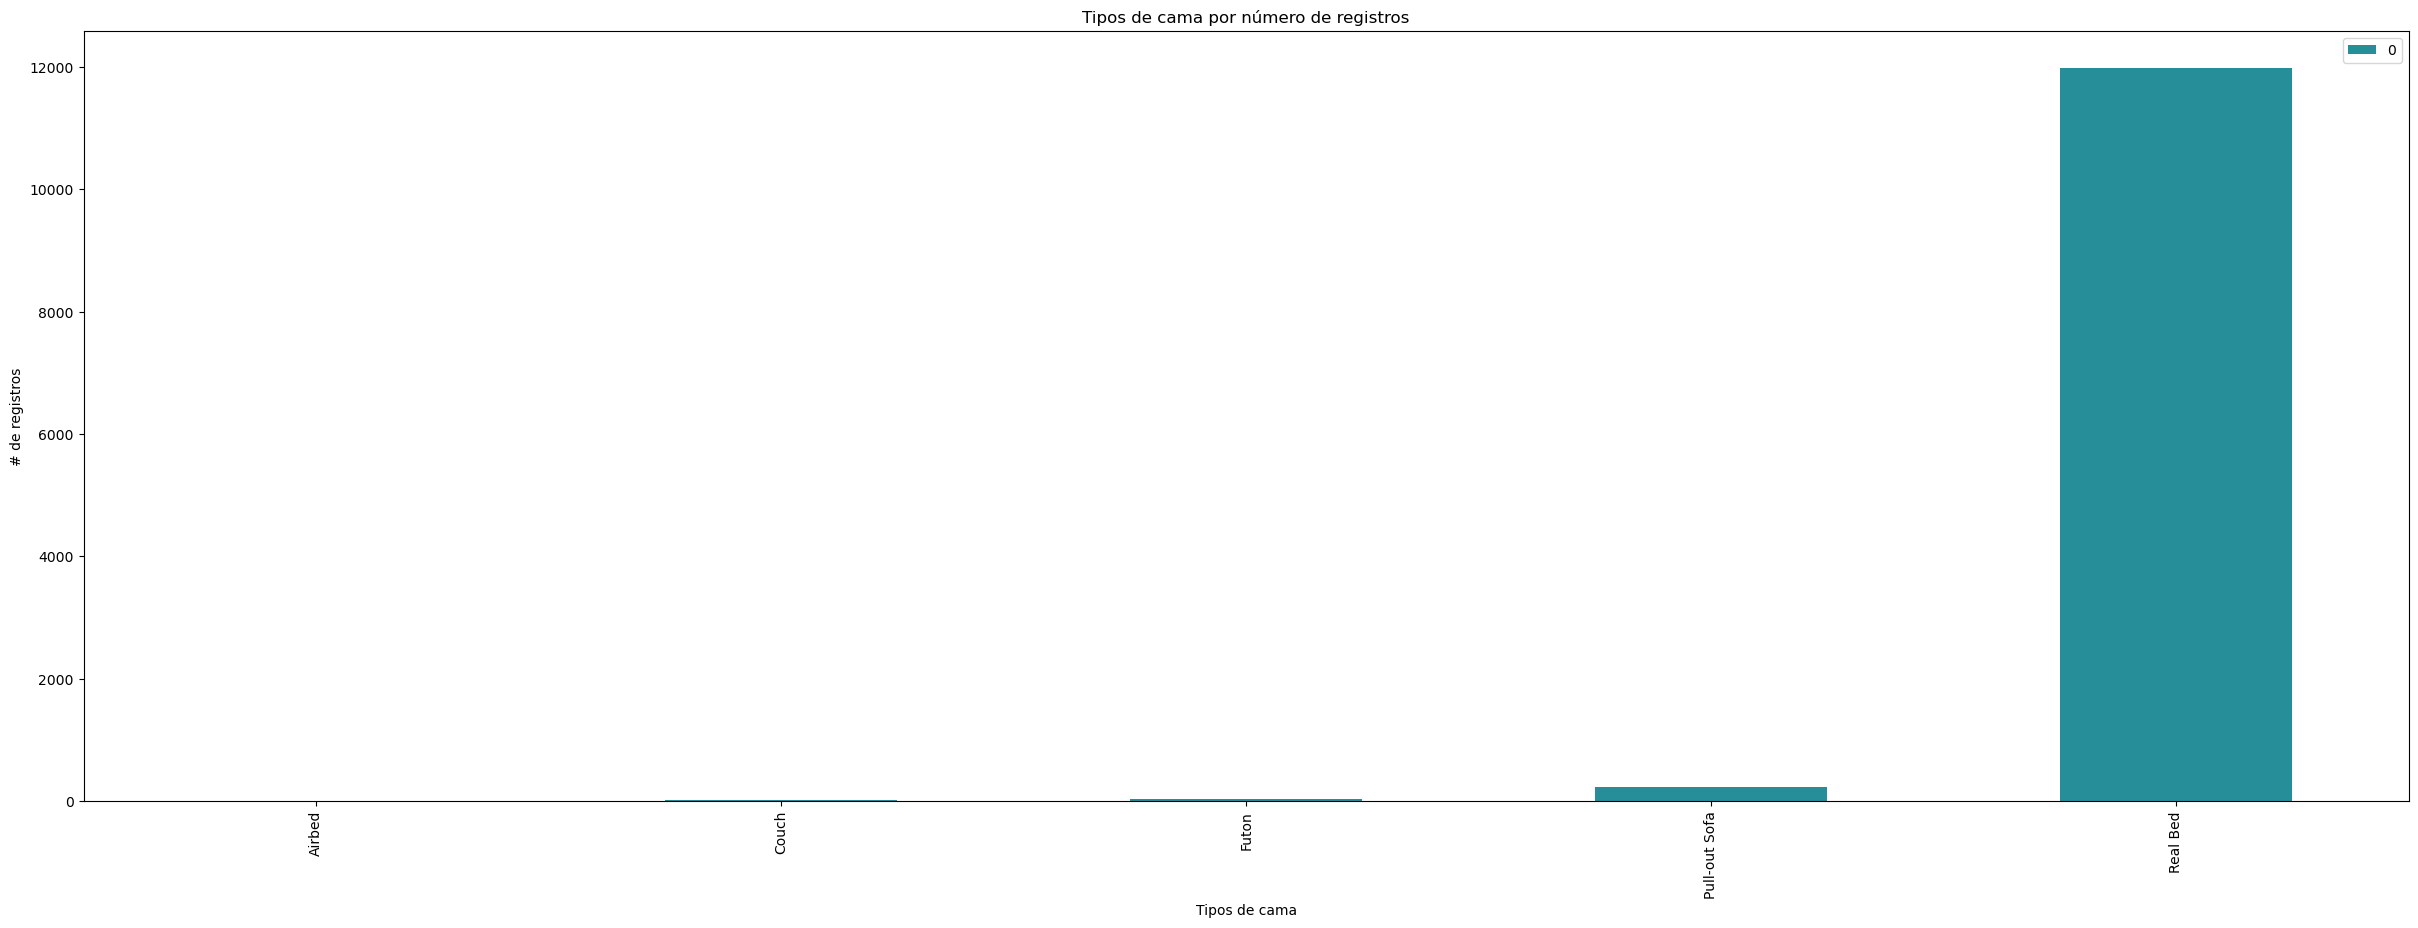

Tipos de cama: 5


In [96]:
# Número de registros en cada barrio
nb_counts = Counter(df['bed type'])
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)

# Dibujamos
ax = tdf.plot(kind='bar', figsize = (30,10), color = '#007A87', alpha = 0.85)
ax.set_title("Tipos de cama por número de registros")
ax.set_xlabel("Tipos de cama")
ax.set_ylabel("# de registros")
plt.show()

print("Tipos de cama:", len(nb_counts))

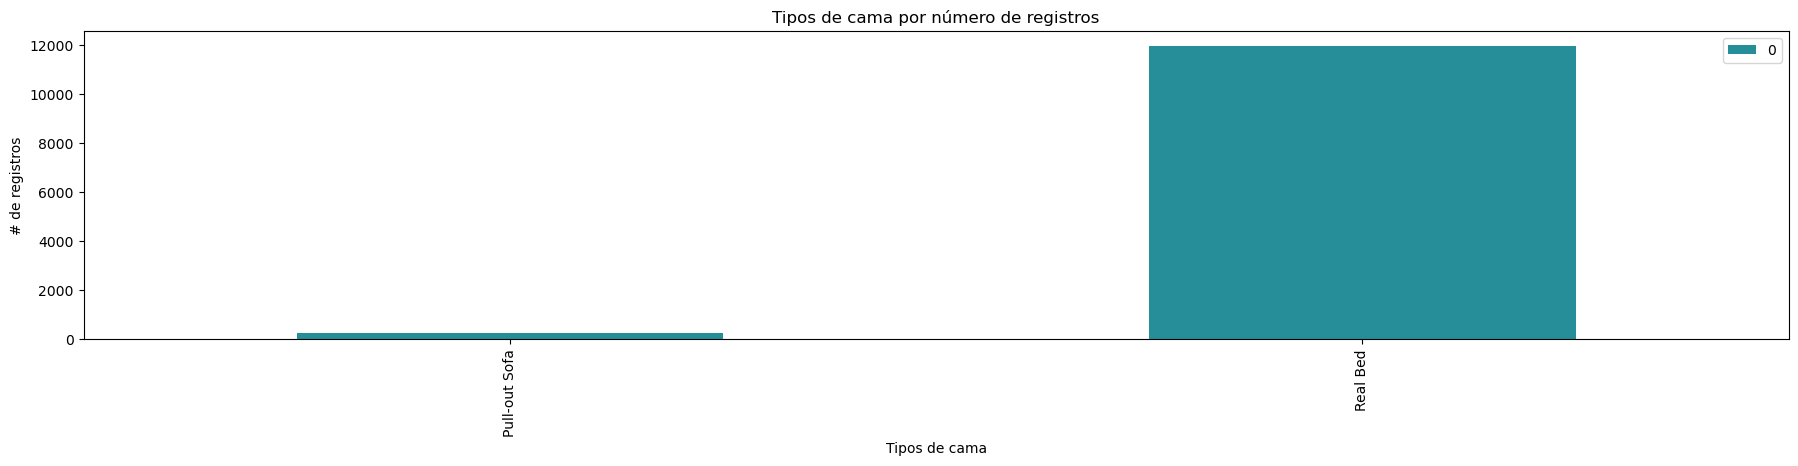

Número de registros eliminado:  54
Número de Tipos de camas: 2


In [97]:
df = remove_entries(df, 100, "bed type", "Tipos de cama")

In [98]:
print ('Número de entradas: ', df.shape[0])
print ('Número de columnas: ', df.shape[1] - 1)

Número de entradas:  12217
Número de columnas:  25


#### 4. Política de cancelación

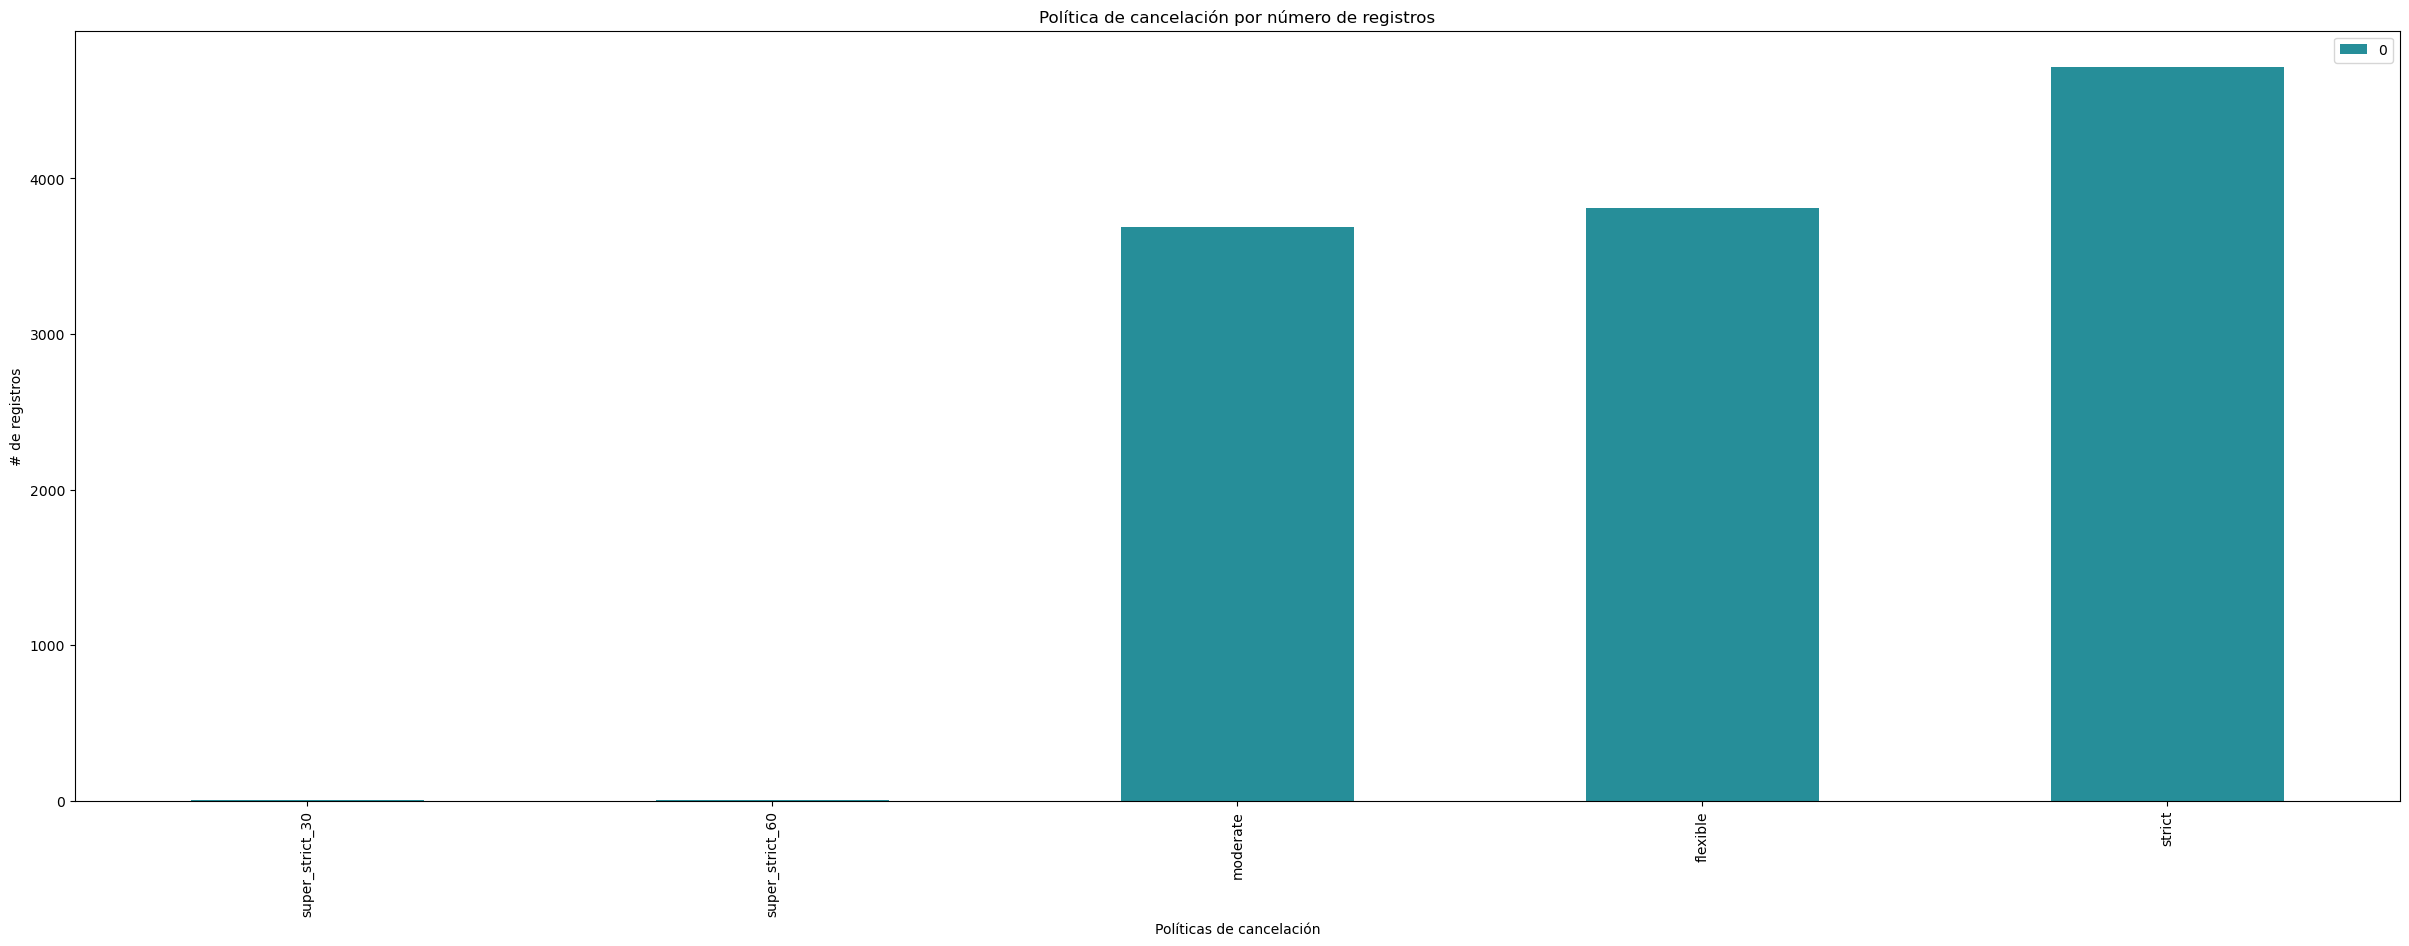

Políticas de cancelación: 5


In [99]:
# Número de registros en cada barrio
nb_counts = Counter(df['cancellation policy'])
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)

# Dibujamos
ax = tdf.plot(kind='bar', figsize = (30,10), color = '#007A87', alpha = 0.85)
ax.set_title("Política de cancelación por número de registros")
ax.set_xlabel("Políticas de cancelación")
ax.set_ylabel("# de registros")
plt.show()

print("Políticas de cancelación:", len(nb_counts))

In [100]:
df["cancellation policy"].value_counts()

strict             4715
flexible           3810
moderate           3686
super_strict_60       4
super_strict_30       2
Name: cancellation policy, dtype: int64

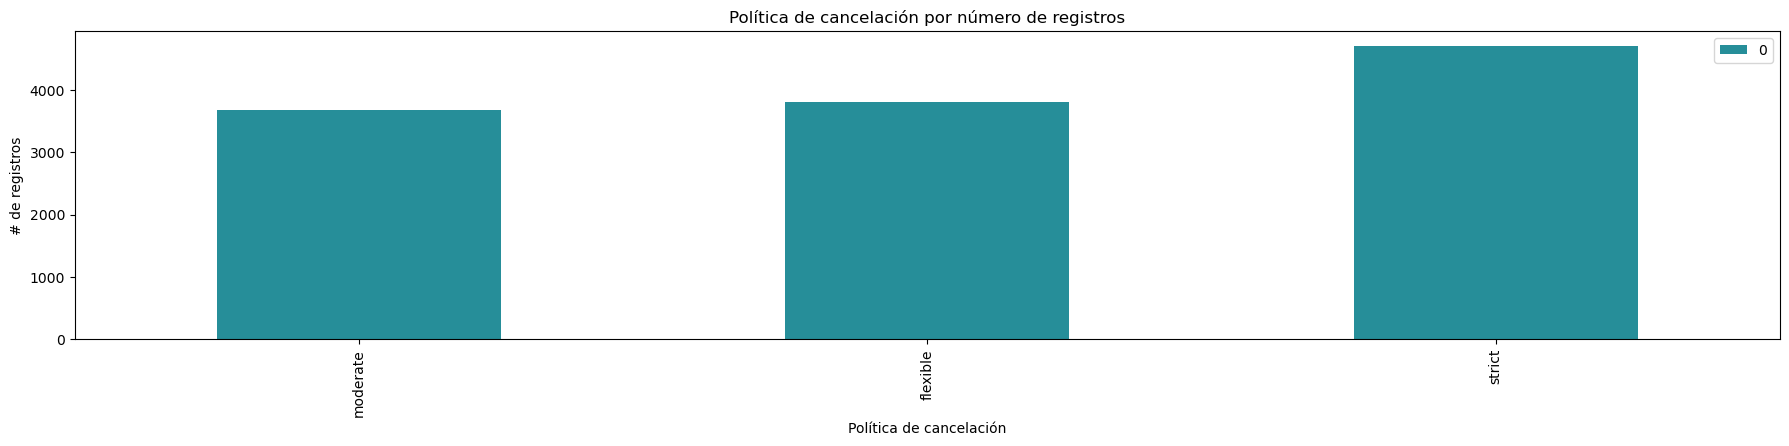

Número de registros eliminado:  6
Número de Política de cancelacións: 3


In [101]:
df = remove_entries(df, 100, "cancellation policy", "Política de cancelación")

In [102]:
print ('Número de entradas: ', df.shape[0])
print ('Número de columnas: ', df.shape[1] - 1)

Número de entradas:  12211
Número de columnas:  25


In [103]:
df.dtypes

host response time      object
host response rate     float64
host verifications       int64
latitude               float64
longitude              float64
property type           object
room type               object
bathrooms              float64
bedrooms               float64
beds                   float64
bed type                object
amenities                int64
security deposit       float64
cleaning fee           float64
guests included          int64
extra people             int64
minimum nights           int64
maximum nights           int64
availability 365         int64
number of reviews        int64
cancellation policy     object
features                 int64
price                  float64
average review         float64
final neighbourhood     object
years being host         int64
dtype: object

### Tratamiento de datos missing

In [104]:
df_nan = df.isnull().sum().sort_values(ascending=False)

df_nan = pd.DataFrame(df_nan, columns=['num_missing'])     
df_nan['%missing_columnas'] = df_nan['num_missing']/df.shape[0]
df_nan= df_nan[df_nan['%missing_columnas']>0]
df_nan

,num_missing,%missing_columnas
security deposit,6856,0.561461
cleaning fee,4750,0.388994
average review,2590,0.212104
host response rate,1528,0.125133
bathrooms,41,0.003358
beds,37,0.003030
bedrooms,21,0.001720
price,8,0.000655


Modificar las variables discretas

In [105]:
def calcular_media_discreta_redondeada(columna):
    valores_disponibles = columna.dropna() 
    media_discreta = round(valores_disponibles.mean()) 
    return media_discreta

variables = ['security deposit', 'cleaning fee', 'host response rate', 'bathrooms', 'beds', 'bedrooms', 'price']

for variable in variables:
    media = calcular_media_discreta_redondeada(df[variable])
    df[variable].fillna(media, inplace=True)

Modificar la variable continua

In [106]:
change = df['average review'].mean()
df['average review'].fillna(change, inplace=True)

In [107]:
df.head(2)

,host response time,host response rate,host verifications,latitude,longitude,property type,room type,bathrooms,bedrooms,beds,bed type,amenities,security deposit,cleaning fee,guests included,extra people,minimum nights,maximum nights,availability 365,number of reviews,cancellation policy,features,price,average review,final neighbourhood,years being host
40,within an hour,84.0,3,40.406953,-3.670894,Apartment,Private room,2.0,1.0,1.0,Real Bed,7,183.0,30.0,1,5,1,1125,240,171,flexible,3,28.0,20.142857,Retiro,2
41,within a few hours,100.0,3,40.425904,-3.681647,Apartment,Entire home/apt,1.0,0.0,1.0,Real Bed,13,100.0,30.0,1,0,2,1125,15,52,moderate,3,58.0,22.285714,Salamanca,2


In [109]:
df_na = df.isnull().sum().sort_values(ascending=False)
df_na

host response time     0
host response rate     0
final neighbourhood    0
average review         0
price                  0
features               0
cancellation policy    0
number of reviews      0
availability 365       0
maximum nights         0
minimum nights         0
extra people           0
guests included        0
cleaning fee           0
security deposit       0
amenities              0
bed type               0
beds                   0
bedrooms               0
bathrooms              0
room type              0
property type          0
longitude              0
latitude               0
host verifications     0
years being host       0
dtype: int64

In [110]:
df.to_csv(path_or_buf='df_limpio.csv')